# Simulador de tigrinho - Cassino Online
---

👻🤑😉
💥🤑💯
🤑💯💯
💥👻👻
😉🤑👻
🤑💥🤑
Foi quase, tente novamente.
👻👻👻
😉👻💥
🤑🤑🤑
👻💯😉
💥😉💥
👻💥👻
Foi quase, tente novamente.
💥👻🤑
😉😉💯
💯👻💥
💯💯😉
😉💯💯
💥🤑🤑
Foi quase, tente novamente.
😉👻👻
👻💥💥
😉😉😉
🤑😉👻
👻😉😉
🤑👻👻
Foi quase, tente novamente.
💯💯😉
🤑🤑🤑
💥😉😉
💥😉👻
👻🤑💥
👻👻👻
Você venceu e recebeu: 30
🤑💯💥
😉💯😉
💯💥😉
🤑💥👻
💥💯💯
👻👻🤑
Foi quase, tente novamente.
🤑👻👻
😉😉😉
😉💯🤑
💥💥💥
🤑🤑😉
🤑💥🤑
Foi quase, tente novamente.
💯💯💯
👻💯😉
🤑👻👻
🤑🤑😉
💥👻💯
👻👻💯
Foi quase, tente novamente.
🤑💯😉
🤑💥💥
😉🤑💥
😉🤑😉
💥💯💥
💥👻💯
Foi quase, tente novamente.
👻💥💯
💯🤑🤑
👻😉💥
💥😉👻
🤑😉😉
🤑😉🤑
Foi quase, tente novamente.
🤑😉😉
😉😉💯
💯👻💯
🤑😉💯
😉😉💥
💥💥💥
Você venceu e recebeu: 30
🤑💯🤑
👻💥😉
👻💯🤑
💥👻😉
💯👻💥
💥💥🤑
Foi quase, tente novamente.
💥💥💥
💯😉💥
🤑💯💥
😉😉😉
🤑🤑🤑
👻👻🤑
Foi quase, tente novamente.
🤑👻👻
😉🤑🤑
😉😉😉
👻👻😉
💯👻👻
💥💥💥
Você venceu e recebeu: 30
💯🤑💥
💯👻🤑
💯👻💯
🤑💯💥
💥🤑👻
👻🤑🤑
Foi quase, tente novamente.
💥💥💥
👻👻👻
💥🤑💯
💥💥💥
👻😉💥
👻👻🤑
Foi quase, tente novamente.
💥😉💥
🤑👻🤑
😉😉😉
👻👻🤑
💥💥💯
😉😉🤑
Foi quase, tente novamente.
💥💯💯
🤑😉🤑
🤑💯💯
👻😉😉
💯😉💥
💯💯💥
Foi quase, tente novamente.
💯💯💯
💥😉😉
💥💯🤑
💥💥🤑
😉😉🤑
💯💯💯
Você venceu e recebeu: 30
👻💥💥
😉🤑🤑
🤑🤑😉
😉💯💥
😉😉😉


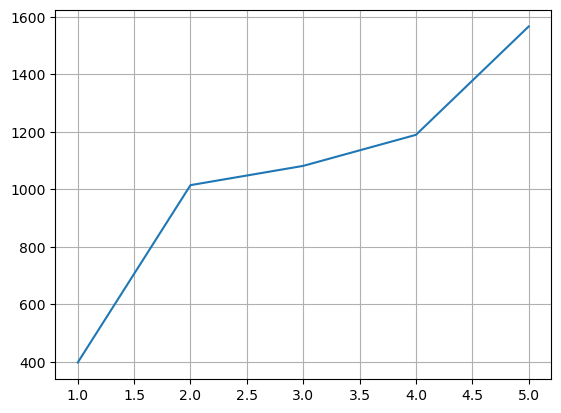

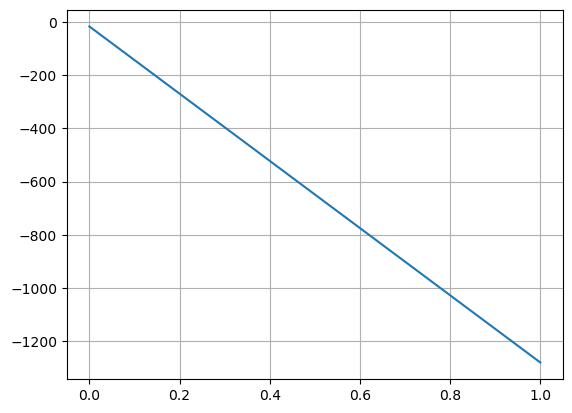

In [6]:
from abc import ABC, abstractmethod
import itertools
import random
from time import sleep
import os
import matplotlib.pyplot as plt

def BaseMachine(ABC):
    @abstractmethod
    def _gen_permutations(self):
        ...
    
    @abstractmethod
    def _get_final_result(self):
        ...

    @abstractmethod
    def _display(self):
        ...
    
    @abstractmethod
    def _checkresult_user(self):
        ...
    
    @abstractmethod
    def _update_balance(self):
        ...
    
    @abstractmethod
    def emojize(self):
        ...
    
    @abstractmethod
    def gain(self):
        ...
    
    @abstractmethod
    def play(self, amount_bet, player):
        ...
        
class Player:
    def __init__(self, balance = 0):
        self.balance = balance

class CassaNiquel:
    
    def __init__(self, level = 1):
        self.SIMBOLOS = {
            'blinking_face':'1F609',
            'money_tongue':'1F911',
            'hundred':'1F4AF',
            'explosion':'1F4A5',
            'ghost':'1F47B',
        }
        self.level = level
        self.permutations = self._gen_permutations()
        self.balance = 0
        self.initial_balance = self.balance
    
    def _gen_permutations(self):
        permutations = list(itertools.product(self.SIMBOLOS.keys(), repeat=3))
        for j in range(self.level):
            for i in self.SIMBOLOS.keys():
                permutations.append((i, i, i))

        return permutations

    def _get_final_result(self):
        if not hasattr(self, 'permutations'):
            self.permutations = self._gen_permutations()
        
        result = list(random.choice(self.permutations))

        if len(set(result)) == 3 and random.randint(0, 5) >= 2:
            result[1] = result[0]
        
        return result

    def _display(self, ammount_bet, result, time=0.2):
        seconds = 1
        for i in range(0, int(seconds / time)):
            print(self._emojize(random.choice(self.permutations)))
            #sleep(time)
            os.system('clear')
        print(self._emojize(result))

        if self._check_result_user(result):
            print(f'Você venceu e recebeu: {ammount_bet*3}')
        else:
            print('Foi quase, tente novamente.')
    
    def _emojize(self, emojis):
        return ''.join(tuple(chr(int(self.SIMBOLOS[code], 16)) for code in emojis))
    
    def _check_result_user(self, result):
        x = [result[0] == x for x in result]
        return True if all(x) else False
    
    def _update_balance(self, amount_bet, result, player: Player):
        if self._check_result_user(result):
            self.balance -= (amount_bet * 3)
            player.balance += (amount_bet * 3) 
        else:
            self.balance += amount_bet
            player.balance -= amount_bet
    
    def play(self, amount_bet, player: Player):
        result = self._get_final_result()
        self._display(amount_bet, result)
        self._update_balance(amount_bet, result, player)

    @property
    def gain(self):
        return self.initial_balance + self.balance

maquina1 = CassaNiquel(level=3)
player1 = Player()
for i in range(1, 100):
    maquina1.play(10, player1)

# print(maquina1.balance)
# print(player1.balance)

JOGADORES_POR_DIA = 2
APOSTAS_POR_DIA = 1
DIAS = 5
VALOR_MAXIMO = 500

saldo = []

players = [Player() for i in range(JOGADORES_POR_DIA)]

for i in range(0, DIAS):
    for j in players:
        for k in range(0, random.randint(1, APOSTAS_POR_DIA)):
            maquina1.play(random.randint(5, VALOR_MAXIMO), j)
    saldo.append(maquina1.gain)

print(maquina1.balance)

plt.figure()
x = [i for i in range(1, DIAS+1)]
y = saldo
plt.plot(x, y)
plt.grid(True)
plt.show()

plt.plot([i for i in range(JOGADORES_POR_DIA)], [i.balance for i in players])
plt.grid(True)
plt.show()